# La data science appliquée à l'expérience de vol 

*Dans ce projet, nous allons étudier les résultats d'un questionnaire administré à près de 100,000 passagers d'une même compagnie aérienne opérant des vols courts, moyens et longs courriers. Notre but est de prouver qu'il est possible, au moyen de procédés simples de data science, de déduire des tendances dont l'exploitation permettra d'améliorer l'expérience passager.* 

*Cette posture, consistant à étudier le service offert avec les yeux du client fait ainsi partie de cette approche "centrée-client" (ou "customer-centric") que nous mettons en avant dans notre mémoire. Nous tenterons ici d'aller plus loin, en mettant en place un modèle prédictif permettant de déterminer avec précision la satisfaction d'un passager à l'issue de son vol. Cette information nous fournira dès lors les clés permettant de cibler les améliorations à fournir pour combler le plus grand nombre d'individus.*

Les données que nous nous proposons d'étudier ici ont été obtenues grâce à l'utilisateur [TJ Klein](https://www.kaggle.com/teejmahal20/airline-passenger-satisfaction) sur le site Kaggle.com. 
Ces données sont originellement issues de la page de [John D](https://www.kaggle.com/johndddddd/customer-satisfaction), regroupant les réponses de près de 130,000 passagers, et qui ont déjà été préalablement nettoyées pour les besoins de l'étude. Précisons que notre étude est librement inspirée des travaux de [Mohamed Harris](https://www.kaggle.com/mohamedharris/discussion), ingénieur logiciel indien.

![Image](https://lejournal.cnrs.fr/sites/default/files/styles/visuel_principal/public/assets/images/saf2015_0175920.jpg)

## Introduction


____

Chaque ligne dans le dataset correspond à un passager et contient des informations sur les caractéristiques de ce dernier ainsi que sur les réponses qu'il a fournies au questionnaire. Voici ci-dessous les intitulés de colonne avec lesquels nous allons travailler, ainsi que leur signification.

**Caractéristiques passager**

* `Gender` - Gender of the passengers (Female, Male)

* `Customer Type` - The customer type (Loyal customer, disloyal customer)

* `Age` - The actual age of the passengers

* `Type of Travel` - Purpose of the flight of the passengers (Personal Travel, Business Travel)

* `Class` - Travel class in the plane of the passengers (Business, Eco, Eco Plus)

* `Flight Distance` - The flight distance of this journey



**Réponses au questionnaire**
*(0:Not Applicable ; 1-5 : Level of satisfaction)*


* `Inflight wifi service` - Satisfaction level of the inflight wifi service

* `Departure/Arrival time convenient` - Satisfaction level of Departure/Arrival time convenient

* `Ease of Online booking` - Satisfaction level of online booking

* `Gate location` - Satisfaction level of Gate location

* `Food and drink` - Satisfaction level of Food and drink

* `Online boarding` - Satisfaction level of online boarding

* `Seat comfort` - Satisfaction level of Seat comfort

* `Inflight entertainment` - Satisfaction level of inflight entertainment

* `On-board service` - Satisfaction level of On-board service

* `Leg room service` - Satisfaction level of Leg room service

* `Baggage handling` - Satisfaction level of baggage handling

* `Check-in service` - Satisfaction level of Check-in service

* `Inflight service` - Satisfaction level of inflight service

* `Cleanliness` - Satisfaction level of Cleanliness

**Autres caractéristiques**

* `Departure Delay in Minutes` - Minutes delayed when departure

* `Arrival Delay in Minutes` - Minutes delayed when Arrival

* `satisfaction` - Airline satisfaction level (satisfaction, neutral or dissatisfaction)

## I - Ouverture et découverte du dataset

____

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

airline_survey = pd.read_csv("/Users/samitahri/Documents/py_files/airline_train.csv")


# Affichage des 5 premiers individus 

airline_survey.head()  

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [2]:
# Affichage des 5 derniers individus

airline_survey.tail()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
103899,103899,94171,Female,disloyal Customer,23,Business travel,Eco,192,2,1,...,2,3,1,4,2,3,2,3,0.0,neutral or dissatisfied
103900,103900,73097,Male,Loyal Customer,49,Business travel,Business,2347,4,4,...,5,5,5,5,5,5,4,0,0.0,satisfied
103901,103901,68825,Male,disloyal Customer,30,Business travel,Business,1995,1,1,...,4,3,2,4,5,5,4,7,14.0,neutral or dissatisfied
103902,103902,54173,Female,disloyal Customer,22,Business travel,Eco,1000,1,1,...,1,4,5,1,5,4,1,0,0.0,neutral or dissatisfied
103903,103903,62567,Male,Loyal Customer,27,Business travel,Business,1723,1,3,...,1,1,1,4,4,3,1,0,0.0,neutral or dissatisfied


In [3]:
# Description générale du dataset (moyenne par colonne, standard deviation, quartiles etc)

airline_survey.describe()

,Unnamed: 0,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103594.000000
mean,51951.500000,64924.210502,39.379706,1189.448375,2.729683,3.060296,2.756901,2.976883,3.202129,3.250375,3.439396,3.358158,3.382363,3.351055,3.631833,3.304290,3.640428,3.286351,14.815618,15.178678
std,29994.645522,37463.812252,15.114964,997.147281,1.327829,1.525075,1.398929,1.277621,1.329533,1.349509,1.319088,1.332991,1.288354,1.315605,1.180903,1.265396,1.175663,1.312273,38.230901,38.698682
min,0.000000,1.000000,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,25975.750000,32533.750000,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,51951.500000,64856.500000,40.000000,843.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,77927.250000,97368.250000,51.000000,1743.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,103903.000000,129880.000000,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


## II - Nettoyage préliminaire du dataset

____

In [4]:
# Affichage du nombre de lignes et colonnes avant nettoyage du dataset

airline_survey.shape

(103904, 25)

In [5]:
# Nous décidons d'abandonner les deux premières colonnes qui servent à identifier les individus 
# et qui n'apportent rien à notre étude

airline_survey.drop(['Unnamed: 0', 'id'], axis='columns', inplace=True)

In [6]:
# Evaluation des valeurs "NA" (Not Available) dans le dataset

total = airline_survey.isnull().sum().sort_values(ascending = False)
percent = round(total/len(airline_survey) * 100, 2)
print(pd.concat([total, percent], axis = 1, keys = ['Total', '%']))

                                   Total    %
Arrival Delay in Minutes             310  0.3
satisfaction                           0  0.0
Food and drink                         0  0.0
Customer Type                          0  0.0
Age                                    0  0.0
Type of Travel                         0  0.0
Class                                  0  0.0
Flight Distance                        0  0.0
Inflight wifi service                  0  0.0
Departure/Arrival time convenient      0  0.0
Ease of Online booking                 0  0.0
Gate location                          0  0.0
Online boarding                        0  0.0
Seat comfort                           0  0.0
Inflight entertainment                 0  0.0
On-board service                       0  0.0
Leg room service                       0  0.0
Baggage handling                       0  0.0
Checkin service                        0  0.0
Inflight service                       0  0.0
Cleanliness                       

In [7]:
# Nous retirons ici les lignes dont la valeur "Arrival Delay in Minutes" est NA, afin de faciliter notre étude

airline_survey.dropna(axis = 0, subset = ['Arrival Delay in Minutes'], inplace = True)


# Affichage du nombre de lignes et colonnes après retrait des NA

airline_survey.shape

(103594, 23)

In [8]:
# Création d'une nouvelle colonne "Delay" qui agrége "Departure Delay in Minutes" et "Arrival Delay in Minutes"

airline_survey['Delay'] = airline_survey['Departure Delay in Minutes'] + airline_survey['Arrival Delay in Minutes']
airline_survey.drop(columns = ['Departure Delay in Minutes', 'Arrival Delay in Minutes'], inplace = True)

In [9]:
# Remplacement des valeurs de la colonne "satisfied" par des booléens

airline_survey.satisfaction.replace({'satisfied' : 1, 'neutral or dissatisfied' : 0}, inplace = True)

In [10]:
# Affichage des 5 premiers individus post-nettoyage

airline_survey.head()  

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,satisfaction,Delay
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,...,5,5,4,3,4,4,5,5,0,43.0
1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,...,1,1,1,5,3,1,4,1,0,7.0
2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,...,5,5,4,3,4,4,4,5,1,0.0
3,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,...,2,2,2,5,3,1,4,2,0,20.0
4,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,...,5,3,3,4,4,3,3,3,1,0.0


## III - Description de l'échantillon statistique

____

### 1) Distribution des âges par genre

Text(0.5, 1.0, 'Age Distribution by Gender')

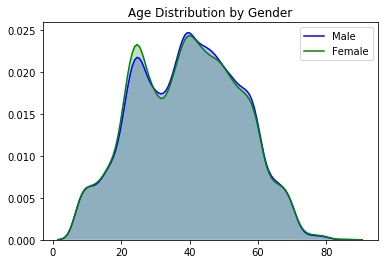

In [11]:
sns.kdeplot(airline_survey.loc[(airline_survey['Gender'] == 'Male'), 'Age'], shade = True, color = 'b', label = 'Male')
sns.kdeplot(airline_survey.loc[(airline_survey['Gender'] == 'Female'), 'Age'], shade = True, color = 'g', label = 'Female')
plt.title('Age Distribution by Gender')

### 2) Distribution des âges par genre et classe de voyageur

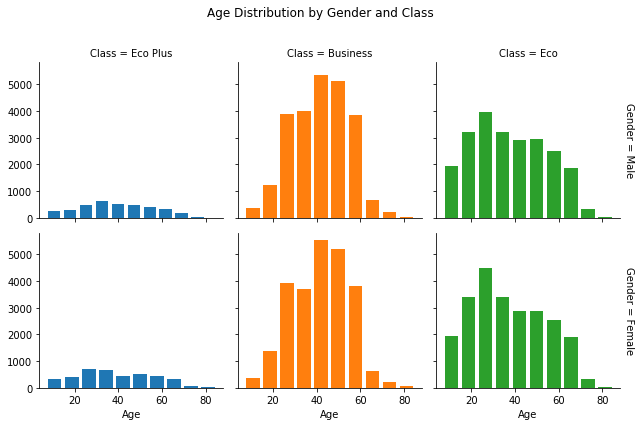

In [12]:
a = sns.FacetGrid(airline_survey, height = 3, row = 'Gender', col = 'Class', hue = 'Class', margin_titles = True)

a.map(plt.hist, 'Age', rwidth = 0.8)
a.fig.suptitle('Age Distribution by Gender and Class')
plt.subplots_adjust(top = 0.85)

### 3) Distribution des âges par genre et type de voyageur

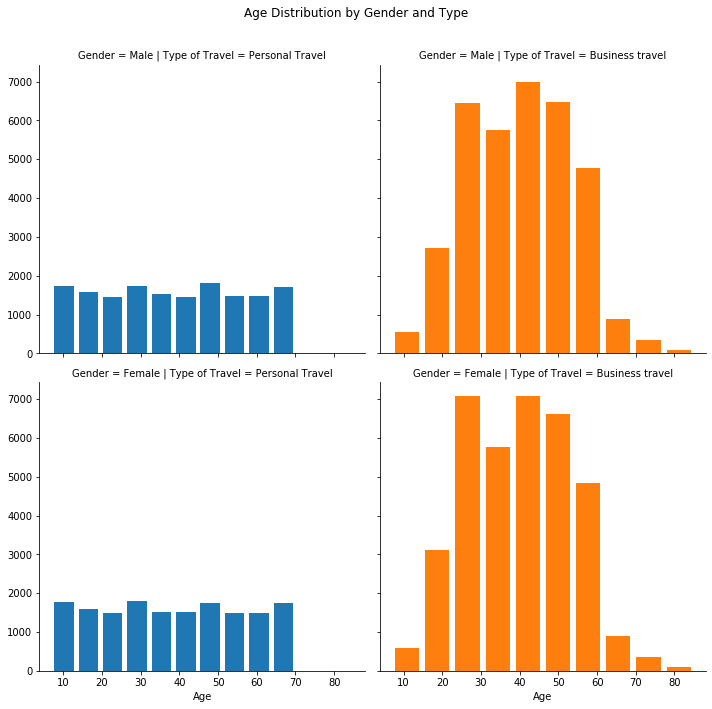

In [13]:
b = sns.FacetGrid(airline_survey, height = 5, row = 'Gender', col = 'Type of Travel', hue = 'Type of Travel')
b.map(plt.hist, 'Age', rwidth = 0.8)
b.fig.suptitle('Age Distribution by Gender and Type')
plt.subplots_adjust(top = 0.90)

### 4) Distribution des distances de vol

Text(0.5, 1.0, 'Flight Distance Distribution')

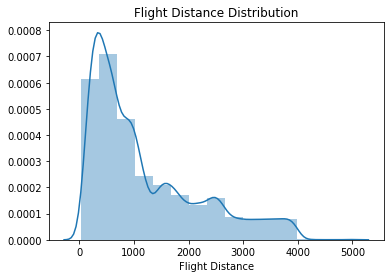

In [14]:
x = airline_survey['Flight Distance']
sns.distplot(x, bins = 15)
plt.title('Flight Distance Distribution')

### 5) Histogrammes des réponses au questionnaire

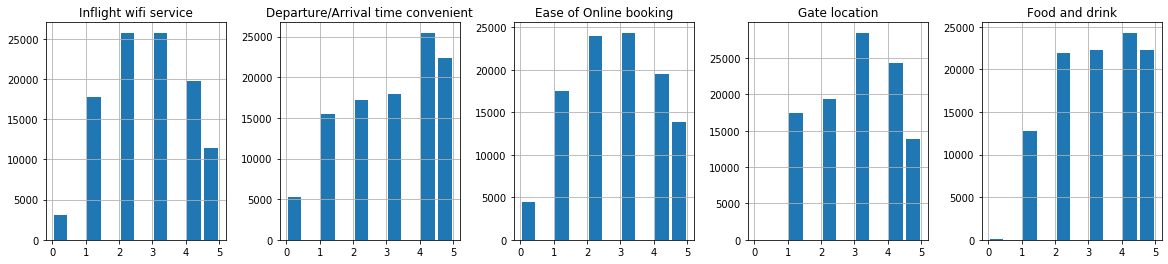

In [15]:
fig, ax = plt.subplots(figsize = (20, 4), ncols = 5)
ax1 = airline_survey.hist('Inflight wifi service', ax = ax[0], rwidth = 0.8)
ax2 = airline_survey.hist('Departure/Arrival time convenient', ax = ax[1], rwidth = 0.8)
ax3 = airline_survey.hist('Ease of Online booking', ax = ax[2], rwidth = 0.8)
ax4 = airline_survey.hist('Gate location', ax = ax[3], rwidth = 0.8)
ax5 = airline_survey.hist('Food and drink', ax = ax[4], rwidth = 0.8)

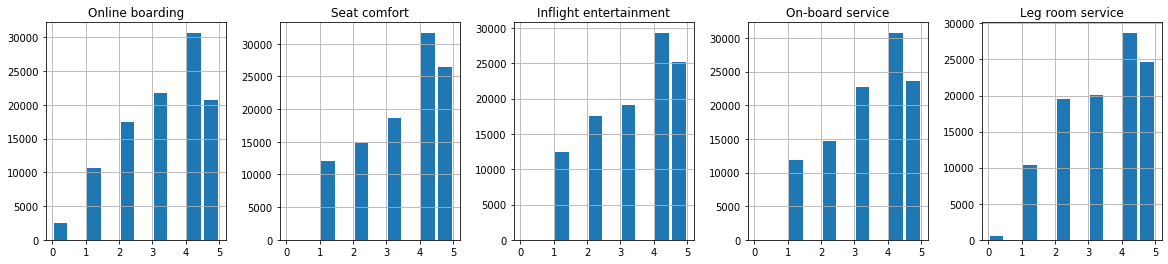

In [16]:
fig, ax = plt.subplots(figsize = (20, 4), ncols = 5)
ax1 = airline_survey.hist('Online boarding', ax = ax[0], rwidth = 0.8)
ax2 = airline_survey.hist('Seat comfort', ax = ax[1], rwidth = 0.8)
ax3 = airline_survey.hist('Inflight entertainment', ax = ax[2], rwidth = 0.8)
ax4 = airline_survey.hist('On-board service', ax = ax[3], rwidth = 0.8)
ax5 = airline_survey.hist('Leg room service', ax = ax[4], rwidth = 0.8)

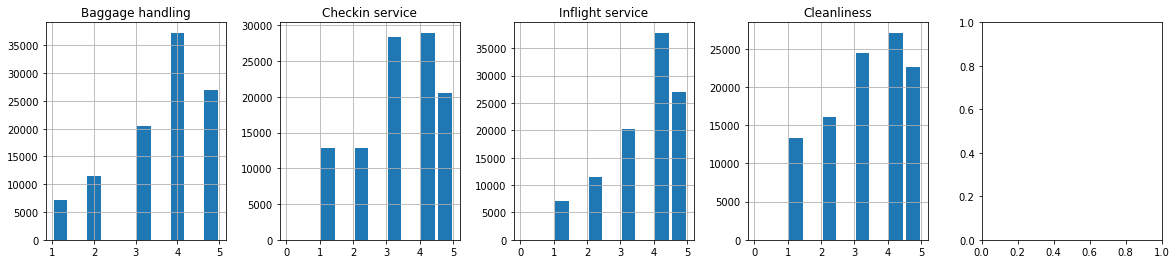

In [17]:
fig, ax = plt.subplots(figsize = (20, 4), ncols = 5)
ax1 = airline_survey.hist('Baggage handling', ax = ax[0], rwidth = 0.8)
ax2 = airline_survey.hist('Checkin service', ax = ax[1], rwidth = 0.8)
ax3 = airline_survey.hist('Inflight service', ax = ax[2], rwidth = 0.8)
ax4 = airline_survey.hist('Cleanliness', ax = ax[3], rwidth = 0.8)

### 6) Taux de satisfaction global par classe de voyageur

In [18]:
def percent(serie):
    return(round(serie.sum() / serie.count(),2))

airline_survey.groupby("Class")["satisfaction"].agg(percent)

Class
Business    0.69
Eco         0.19
Eco Plus    0.25
Name: satisfaction, dtype: float64

**Lecture :** il y a 69% des passagers "Business" qui se déclarent globalement satisfaits de leur expérience de vol, contre 19% des voyageurs "Eco".

## IV - Analyse des corrélations

____

### 1) Préparation du dataset pour une analyse numérique

#### A) Remplacement de l'âge, de la distance de vol et du retard par tranche

In [19]:
# Affichage des 5 premiers individus (colonnes "Age", "Flight Distance" et "Delay")

airline_survey[["Age","Flight Distance", "Delay"]].head()

,Age,Flight Distance,Delay
0,13,460,43.0
1,25,235,7.0
2,26,1142,0.0
3,25,562,20.0
4,61,214,0.0


In [20]:
# Remplacement de l'âge par tranche

def replaceAge(df):
    if(df['Age'] <= 15):
        return "A"
    elif(df['Age'] > 15) & (df['Age'] <= 30):
        return "B"
    elif(df['Age'] > 30) & (df['Age'] <= 45):
        return "C"
    elif(df['Age'] > 46) & (df['Age'] <= 60):
        return "D"
    elif(df['Age'] > 61) & (df['Age'] <= 75):
        return "E"
    else:
        return "F"
    
    
airline_survey['Age'] = airline_survey.apply(lambda airline_survey: replaceAge(airline_survey), axis = 1)

In [21]:
# Remplacement de la distance de vol par tranche

def replaceDist(df):
    if(df['Flight Distance'] <= 500):
        return "A"
    elif(df['Flight Distance'] > 500) & (df['Flight Distance'] <= 1000):
        return "B"
    elif(df['Flight Distance'] > 1000) & (df['Flight Distance'] <= 1500):
        return "C"
    elif(df['Flight Distance'] > 1500) & (df['Flight Distance'] <= 2000):
        return "D"
    elif(df['Flight Distance'] > 2000) & (df['Flight Distance'] <= 2500):
        return "E"
    elif(df['Flight Distance'] > 2500) & (df['Flight Distance'] <= 3000):
        return "F"
    elif(df['Flight Distance'] > 3000) & (df['Flight Distance'] <= 3500):
        return "G"
    elif(df['Flight Distance'] > 3500) & (df['Flight Distance'] <= 4000):
        return "H"
    else:
        return "I"
    
airline_survey['Flight Distance'] = airline_survey.apply(lambda airline_survey:replaceDist(airline_survey), axis = 1)

In [22]:
airline_survey['Delay'].value_counts()

0.0       47459
1.0        3174
2.0        2648
3.0        2344
4.0        2104
          ...  
790.0         1
825.0         1
846.0         1
679.0         1
1140.0        1
Name: Delay, Length: 767, dtype: int64

In [23]:
# Remplacement de l'âge par tranche

def replaceDelay(df):
    if(df['Delay'] <= 0.0):
        return "A"
    elif(df['Delay'] > 0.0) & (df['Delay'] <= 15.0):
        return "B"
    elif(df['Delay'] > 15.0) & (df['Delay'] <= 30.0):
        return "C"
    elif(df['Delay'] > 30.0) & (df['Delay'] <= 60.0):
        return "D"
    elif(df['Delay'] > 60.0) & (df['Delay'] <= 120.0):
        return "E"
    else:
        return "F"
    
    
airline_survey['Delay'] = airline_survey.apply(lambda airline_survey: replaceDelay(airline_survey), axis = 1)

In [24]:
# Affichage des 5 premiers individus post-remplacement (colonnes "Age", "Flight Distance" et "Delay")

airline_survey[["Age","Flight Distance", "Delay"]].head()

,Age,Flight Distance,Delay
0,A,A,D
1,B,A,B
2,B,C,A
3,B,B,C
4,F,A,A


#### B) Encodage des colonnes non-numériques

In [25]:
# Attribution du type "category" aux colonnes non-numériques

num_cols = airline_survey.select_dtypes(['int64', 'float64']).columns.tolist()
obj_cols = airline_survey.select_dtypes(['object']).columns.tolist()

for i in obj_cols:
    airline_survey[i] = airline_survey[i].astype('category')

In [26]:
# Affichage des colonnes numériques

num_cols

['Inflight wifi service',
 'Departure/Arrival time convenient',
 'Ease of Online booking',
 'Gate location',
 'Food and drink',
 'Online boarding',
 'Seat comfort',
 'Inflight entertainment',
 'On-board service',
 'Leg room service',
 'Baggage handling',
 'Checkin service',
 'Inflight service',
 'Cleanliness',
 'satisfaction']

In [27]:
# Affichage des colonnes non-numériques

obj_cols

['Gender',
 'Customer Type',
 'Age',
 'Type of Travel',
 'Class',
 'Flight Distance',
 'Delay']

In [28]:
# Affichage des 5 premiers individus des colonnes non-numériques

airline_survey[obj_cols].head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Delay
0,Male,Loyal Customer,A,Personal Travel,Eco Plus,A,D
1,Male,disloyal Customer,B,Business travel,Business,A,B
2,Female,Loyal Customer,B,Business travel,Business,C,A
3,Female,Loyal Customer,B,Business travel,Business,B,C
4,Male,Loyal Customer,F,Business travel,Business,A,A


In [29]:
# Encodage des colonnes non-numériques

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
airline_survey[obj_cols] = airline_survey[obj_cols].apply(lambda col : le.fit_transform(col))

In [30]:
# Affichage des 5 premiers individus post-encodage

airline_survey[obj_cols].head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Delay
0,1,0,0,1,2,0,3
1,1,1,1,0,0,0,1
2,0,0,1,0,0,2,0
3,0,0,1,0,0,1,2
4,1,0,5,0,0,0,0


### 2) Carte de fréquentation du dataset `airline_survey`

***Définition*** : *une carte de fréquentation ("heatmap" en anglais) est une représentation graphique de données statistiques qui fait correspondre à l'intensité d'une grandeur variable une gamme de tons ou un nuancier de couleurs sur une matrice à deux dimensions.*

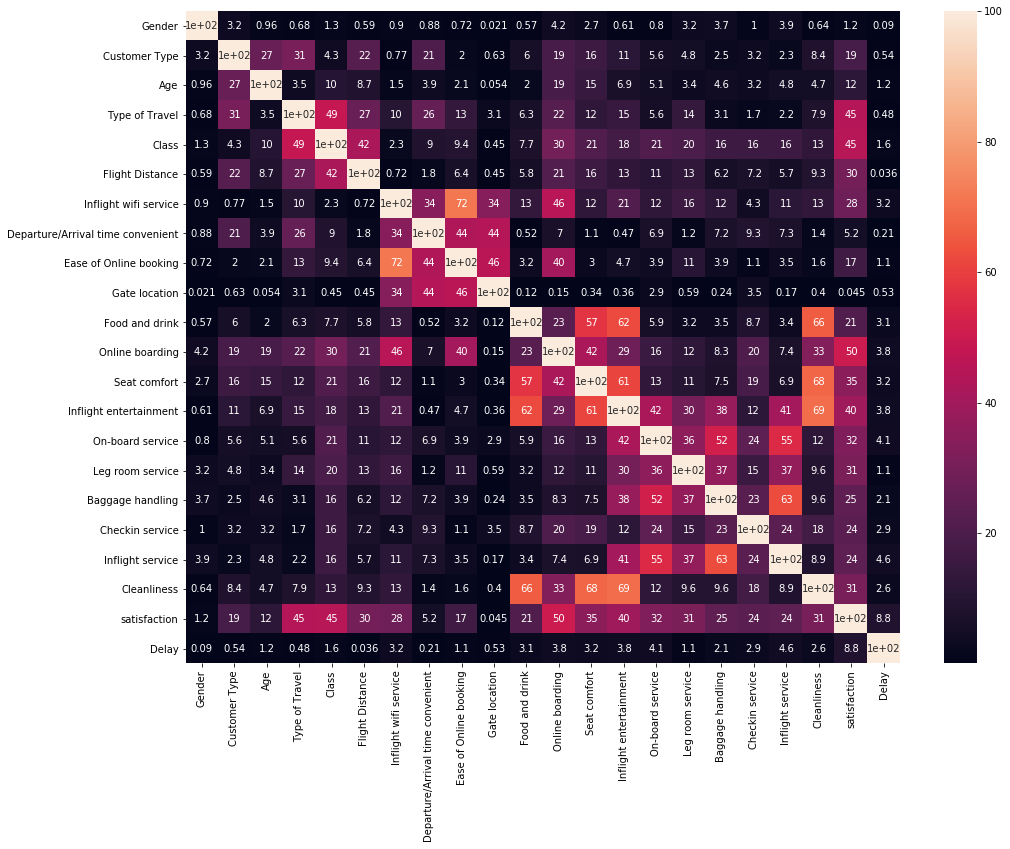

In [31]:
fig, ax = plt.subplots(figsize = (16,12))
sns.heatmap(abs(airline_survey.corr()) * 100, annot = True)

**Exemple de lecture :** la satisfaction apportée par la nourriture et les boissons ("Food and drink") est fortement corrélée aux yeux du passager à celle de la propreté à bord ("Cleanliness"). C'est ce que témoigne la heatmap ci-dessus, qui avance une corrélation de 66% entre "Food and drink" et "Cleanliness". 

## V - Mise en place d'un modèle prédictif de la satisfaction globale du passager

____

### 1) Séparation du dataset `airline_survey` en deux parties : `train` et `test`

Nous allons ici séparer le set de données en deux parties, avec respectivement 80% des données dans `train` et 20% des données dans `test`.

Le dataset `train` va nous permettre d'entraîner le modèle tandis que `test` nous permettra de tester la précision de ses prédictions, en les comparant *in fine* avec les satisfactions réelles des passagers de cet échantillon.

In [32]:
# Affichage du nombre de lignes de airline_survey

row, colonne = airline_survey.shape
print(row)

103594


In [33]:
# Calcul de la dernière ligne du dataset "train"

max_row_train = round(row * 0.8)
print(max_row_train)

82875


In [34]:
# Séparation en deux dataset

train = airline_survey[:max_row_train]
test = airline_survey[max_row_train:]

In [35]:
# Affichage de la shape et des 5 premiers individus du dataset "train"

print(train.shape)
train.head()

(82875, 22)


,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,satisfaction,Delay
0,1,0,0,1,2,0,3,4,3,1,...,5,5,4,3,4,4,5,5,0,3
1,1,1,1,0,0,0,3,2,3,3,...,1,1,1,5,3,1,4,1,0,1
2,0,0,1,0,0,2,2,2,2,2,...,5,5,4,3,4,4,4,5,1,0
3,0,0,1,0,0,1,2,5,5,5,...,2,2,2,5,3,1,4,2,0,2
4,1,0,5,0,0,0,3,3,3,3,...,5,3,3,4,4,3,3,3,1,0


In [36]:
# Affichage de la shape et des 5 premiers individus du dataset "test" après reset des index

test.reset_index(drop = True, inplace = True)
print(test.shape)
test.head()

(20719, 22)


,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,satisfaction,Delay
0,0,0,0,0,2,2,3,5,5,5,...,2,3,1,4,3,2,3,3,0,4
1,0,1,1,0,0,2,2,4,2,3,...,1,3,4,5,4,3,5,3,0,0
2,0,0,3,0,0,3,3,3,3,3,...,4,5,5,5,5,3,5,5,1,0
3,0,1,1,0,0,1,0,4,0,3,...,3,3,5,3,3,3,4,3,1,0
4,1,0,2,0,0,2,2,4,4,4,...,4,2,2,2,2,1,2,4,0,4


### 2) Régression logistique

***Définition*** : *La régression logistique ou "modèle logit" est un modèle de régression binomiale. Comme pour tous les modèles de régression binomiale, il s'agit de modéliser au mieux un modèle mathématique simple à des observations réelles nombreuses.*

In [37]:
# Importation des librairies nécessaires à la mise en place du modèle prédictif

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

LR = LogisticRegression()

In [38]:
# Retrait des colonnes correspondant aux réponses au questionnaire (non-utilisables dans la prédiction)

train_df = train.drop(columns = ['Departure/Arrival time convenient', 'Ease of Online booking',
                               'Gate location', 'Food and drink', 'Inflight wifi service', 'Online boarding',
                               'Seat comfort', 'Inflight entertainment', 'On-board service',
                               'Leg room service', 'Baggage handling', 'Checkin service',
                                 'Inflight service', 'Cleanliness'])

test_df = test.drop(columns = ['Departure/Arrival time convenient', 'Ease of Online booking',
                                'Gate location', 'Food and drink', 'Inflight wifi service', 'Online boarding',
                                'Seat comfort', 'Inflight entertainment', 'On-board service',
                                'Leg room service', 'Baggage handling', 'Checkin service',
                                   'Inflight service', 'Cleanliness'])

# Affichage des colonnes restantes
# Ce sont en réalité nos variables explicatives, qui correspondent aux caractéristiques du passager

train_df.columns

Index(['Gender', 'Customer Type', 'Age', 'Type of Travel', 'Class',
       'Flight Distance', 'satisfaction', 'Delay'],
      dtype='object')

In [39]:
train_x = train_df.drop('satisfaction', axis = 1) # Variables explicatives d'entrainement
train_y = train_df['satisfaction']  # Variable expliquée d'entrainement


test_x = test_df.drop('satisfaction', axis = 1) # Variables explicatives de test
test_y = test_df['satisfaction']  # Variable expliquée de test


# Régression logistique grâce aux variables explicatives et expliquée d'entrainement
# Ici, on entraine le modèle
LR.fit(train_x, train_y)

# Comparaisons des prédictions avec les résultats réels afin de déterminer la précision du modèle
# Ici, on teste le modèle
pred = LR.predict(test_x)
accuracy_score(pred, test_y)

0.7864761812828804

**Lecture :** le modèle de régression logistique prédit correctement dans 79% des cas la satisfaction globale (1 ou 0) du passager. 

### 3) Random Forest classifier

***Définition*** : *Les forêts d'arbres décisionnels (ou forêts aléatoires de l'anglais "random forest classifier") font partie des techniques d'apprentissage automatique. Cet algorithme combine les concepts de sous-espaces aléatoires et de bagging. L'algorithme des forêts d'arbres décisionnels effectue un apprentissage sur de multiples arbres de décision entraînés sur des sous-ensembles de données légèrement différents.*

In [41]:
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier()

RF.fit(train_x, train_y)
pred = RF.predict(test_x)

print('Accuracy on Testing set: ', accuracy_score(pred, test_y))

Accuracy on Testing set:  0.7950190646266712


**Lecture :** le modèle Random Forest prédit correctement dans 80% des cas la satisfaction globale (1 ou 0) du passager. 

### Conclusion 

Nos deux modèles prédisent avec une étonnante précision (près de 80% de réussite) la satisfaction d'un passager, au moyen de quelques variables explicatives : le genre, l'âge, le type et la classe du voyageur, la distance de vol et le retard à l'issue du vol.
Dès lors, nombreuses sont les possibilités pour la compagnie aérienne souhaitant mettre à profit cette information tout en adoptant une approche customer-centric : envoyer aux clients déterminés comme "non-satisfaits" un cadeau, un coupon de réduction, leur envoyer un mail d'excuse ou encore leur proposer de participer à un "jeu-loterie".

Ce modèle pourrait être amélioré en ajoutant de nouvelles variables prédictives qui influenceraient l'expérience passager : type d'appareils (A320, B777 etc), région opérée (Europe, Afrique, Asie), nombre de turbulences lors du vol etc.

Précisons enfin que les possibilités offertes par la data science sont nombreuses et que le projet présenté ici ne met en avant qu'une infime partie des outils employables par les compagnies aériennes souhaitant aborder efficacement leur entrée dans les années 20.